<a href="https://colab.research.google.com/github/Ianoow/calculator-/blob/main/machine_learning_asssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective:**
# Build and evaluate a logistic regression model that predicts whether a customer will default on their credit card payment next month.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Read and Convert the first row to be the header
df=pd.read_csv('credit card information.csv', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#Check for duplicated entries using ID column
df=pd.DataFrame(df)
if df['ID'].duplicated().any():
  print('ID column has duplicates')
  print(df[df['ID'].duplicated()])
else:
  print('ID column has no duplicates')

ID column has no duplicates


In [ ]:
# Check for missing values.
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


missing values can reduce the sample size, introduce bias and make it difficult to apply certain analysis techniques that require complete data.

**ways of handling missing values**

1.Removing Rows with Missing Values


2.Mean, Median and Mode Imputation:

This method involves replacing missing values with the mean, median or mode of the relevant variable.

In [ ]:
#drop id column
df.drop('ID', axis=1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Feature Engineering is the process of selecting, creating or modifying features like input variables or data to help machine learning models learn patterns more effectively.



**we use standardization**

When your data has outliers or is not normally distributed.
When you want to transform your data to have zero mean and unit variance.

**we use normalization**

Data has no outliers

In [ ]:
#create any new variables
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
df['TOTAL_BILL'] = df[bill_cols].sum(axis=1)
df['TOTAL_PAY'] = df[pay_cols].sum(axis=1)
df['BILL_PAY_DIFFERENCE'] = df['TOTAL_BILL'] - df['TOTAL_PAY']
df['PAY_TO_BILL_RATIO'] = df['TOTAL_PAY'] / (df['TOTAL_BILL'] + 1)
df['BILL TO PAY RATIO'] = df['TOTAL_BILL'] / (df['TOTAL_PAY'] + 1)
df['BILL_TO_LIMIT_RATIO'] = df['TOTAL_BILL'] / (df['LIMIT_BAL'] + 1)

display(df[['TOTAL_BILL', 'TOTAL_PAY','BILL_PAY_DIFFERENCE', 'PAY_TO_BILL_RATIO','BILL TO PAY RATIO', 'BILL_TO_LIMIT_RATIO']].head())

,TOTAL_BILL,TOTAL_PAY,BILL_PAY_DIFFERENCE,PAY_TO_BILL_RATIO,BILL TO PAY RATIO,BILL_TO_LIMIT_RATIO
0,7704,689,7015,0.089422,11.165217,0.385181
1,17077,5000,12077,0.292774,3.414717,0.142307
2,101653,11018,90635,0.108387,9.225247,1.129465
3,231334,8388,222946,0.036259,27.575873,4.626587
4,109339,59049,50290,0.540049,1.851634,2.186736


In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,TOTAL_BILL,TOTAL_PAY,BILL_PAY_DIFFERENCE,PAY_TO_BILL_RATIO,BILL TO PAY RATIO,BILL_TO_LIMIT_RATIO
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,7704,689,7015,0.089422,11.165217,0.385181
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,17077,5000,12077,0.292774,3.414717,0.142307
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,101653,11018,90635,0.108387,9.225247,1.129465
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,231334,8388,222946,0.036259,27.575873,4.626587
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,109339,59049,50290,0.540049,1.851634,2.186736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,725349,42550,682799,0.058661,17.046579,3.297026
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,21182,14490,6692,0.684039,1.461735,0.141212
29997,29998,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,70496,31300,39196,0.443991,2.252196,2.349788
29998,29999,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,266611,147181,119430,0.552042,1.811438,3.332596


In [ ]:
columns_to_drop = [
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
df = df.drop(columns=columns_to_drop, axis=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,TOTAL_BILL,TOTAL_PAY,BILL_PAY_DIFFERENCE,PAY_TO_BILL_RATIO,BILL TO PAY RATIO,BILL_TO_LIMIT_RATIO
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,7704,689,7015,0.089422,11.165217,0.385181
1,2,120000,2,2,2,26,-1,2,0,0,0,2,1,17077,5000,12077,0.292774,3.414717,0.142307
2,3,90000,2,2,2,34,0,0,0,0,0,0,0,101653,11018,90635,0.108387,9.225247,1.129465
3,4,50000,2,2,1,37,0,0,0,0,0,0,0,231334,8388,222946,0.036259,27.575873,4.626587
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,0,109339,59049,50290,0.540049,1.851634,2.186736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,0,725349,42550,682799,0.058661,17.046579,3.297026
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,0,21182,14490,6692,0.684039,1.461735,0.141212
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,1,70496,31300,39196,0.443991,2.252196,2.349788
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,1,266611,147181,119430,0.552042,1.811438,3.332596


In [ ]:
default_column = df['default payment next month']
df = df.drop(columns=['default payment next month'])
df['default payment next month'] = default_column
display(df.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,TOTAL_BILL,TOTAL_PAY,BILL_PAY_DIFFERENCE,PAY_TO_BILL_RATIO,BILL TO PAY RATIO,BILL_TO_LIMIT_RATIO,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,7704,689,7015,0.089422,11.165217,0.385181,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,17077,5000,12077,0.292774,3.414717,0.142307,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,101653,11018,90635,0.108387,9.225247,1.129465,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,231334,8388,222946,0.036259,27.575873,4.626587,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,109339,59049,50290,0.540049,1.851634,2.186736,0


In [ ]:
#encoding
encoding = {

# Target variable

Those who are likely to default - 1 Those who are not likely to default- 0

In [ ]:
df['default payment next month'].value_counts()

,count
default payment next month,
0,23364
1,6636


In [ ]:
import seaborn as sns

<Axes: xlabel='default payment next month', ylabel='count'>

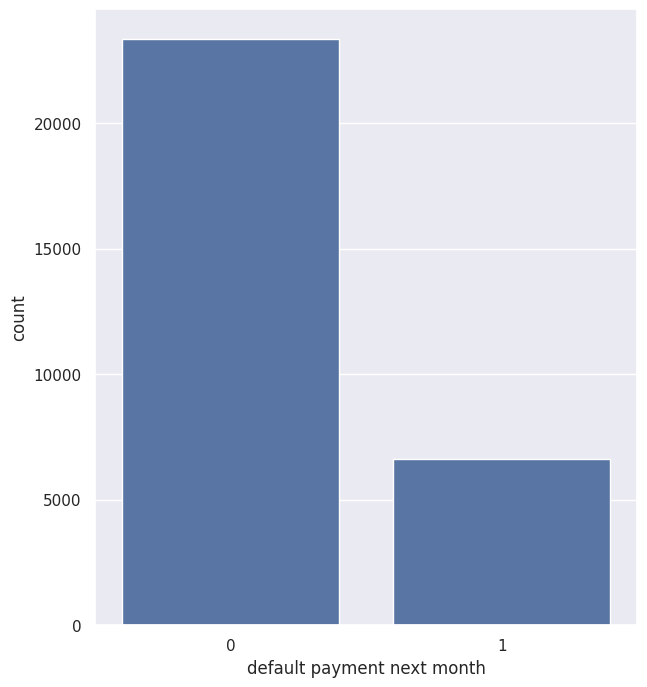

In [ ]:
sns.set(rc={'figure.figsize':(7,8)})
sns.set_theme(style="darkgrid")
sns.countplot(x="default payment next month", data=df)

# balancing the data set

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=42)

# Define dependent and indepenent variables

In [ ]:
# Label Independent features
X=df.drop('default payment next month',axis=1)

# target feature
y=df['default payment next month']

In [ ]:
sm = SMOTE(random_state=123)
X, y = sm.fit_resample(X, y)
y.value_counts()

,count
default payment next month,
1,23364
0,23364


In [ ]:
X,y=sm.fit_resample(X,y)

In [ ]:
X.shape

(46728, 18)

In [ ]:
y.shape

(46728,)

# split the data set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_test

array([[-1.12200122, -0.59064751, -1.01016346, ..., -0.01433561,
        -0.04199905,  0.36572866],
       [ 1.12242968, -0.67009452, -1.01016346, ..., -0.01430429,
        -0.04311905, -0.21673296],
       [ 0.52738675, -0.03451845,  0.98993879, ..., -0.01431632,
        -0.04286392, -0.59149538],
       ...,
       [ 0.04031677, -0.98788256,  0.98993879, ..., -0.01387617,
        -0.04401733,  0.45681097],
       [-1.15572786, -0.43175349, -1.01016346, ..., -0.01419848,
        -0.04377362,  0.09459748],
       [-0.02010518,  0.83939866,  0.98993879, ..., -0.01335441,
        -0.04408205, -0.83165447]])

# logistic model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

# Model evaluation

In [ ]:
predictions=lr.predict(X_test)

In [ ]:
predictions

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
lr.predict_proba(X_test)

array([[0.08709891, 0.91290109],
       [0.1390665 , 0.8609335 ],
       [0.48850443, 0.51149557],
       ...,
       [0.70429585, 0.29570415],
       [0.37229764, 0.62770236],
       [0.90066493, 0.09933507]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,predictions)

<Axes: title={'center': 'confusion matrix'}>

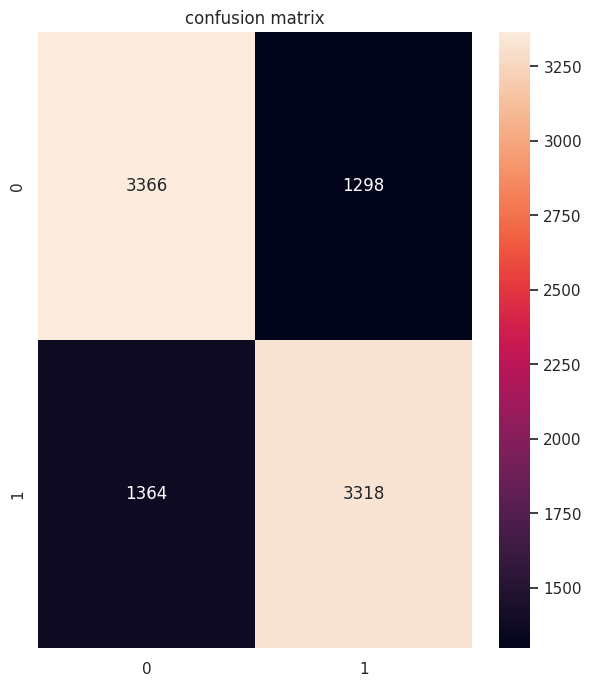

In [ ]:
import matplotlib.pyplot as plt
plt.title('confusion matrix')
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      4664
           1       0.72      0.71      0.71      4682

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346



In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
y_pred_prob=lr.predict_proba(X_test)[:,1]
y_pred_prob

array([0.91290109, 0.8609335 , 0.51149557, ..., 0.29570415, 0.62770236,
       0.09933507])

In [ ]:
y_pred_prob=lr.predict_proba(X_test)[:,1]
y_pred_prob

np.float64(0.7851707352636241)

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

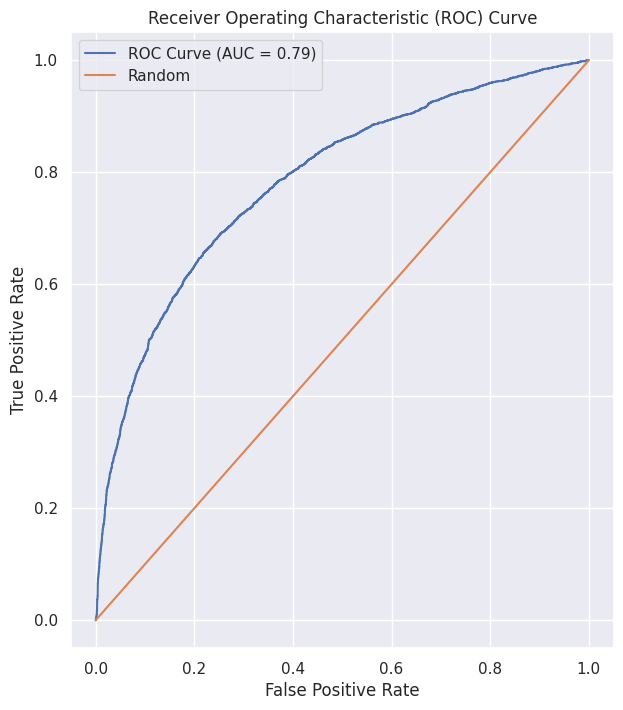

In [ ]:
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1],label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

1. False Negative (FN)  Model predicts “NO default” but customer actually defaults → WORSE
Business impact:

The bank approves a loan for someone who will fail to pay.

This leads to direct financial loss:
Customer impact:

Customer may get a loan they cannot afford, pushing them into:


**If you LOWER the threshold**
The model becomes more sensitive and predicts more positives (more defaults).

✔ What increases?

Recall (Sensitivity)

You catch more of the actual defaulters.
**If you RAISE the threshold (e.g., from 0.5 → 0.7)**

The model becomes stricter and predicts fewer positives (fewer defaults).

✔ What increases?

Precision ↑

You only label someone as “default” when the model is very confident.

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4664
           1       0.75      0.77      0.76      4682

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.76      9346
weighted avg       0.76      0.76      0.76      9346



In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

np.float64(0.756556165981464)

# Hyperparameter Tuning

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [ ]:
#the best parameters found
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best cross-validated recall score:", best_score)

# Evaluate the best model on the test set
best_model_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy using the best model:", best_model_accuracy)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validated recall score: 0.712880197389494
Test set accuracy using the best model: 0.7395677295099508


In [ ]:
#Decision Tree  after parameter tuning and using best hyperpaarameter
dtc = DecisionTreeClassifier(random_state=42,**best_params)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       112
           1       0.89      0.86      0.88        88

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200



In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

np.float64(0.8916396103896104)